# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# import packages
import pickle
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import cv2

from tensorflow.contrib.layers import flatten
from numpy import newaxis
# Visualizations will be shown in the notebook.
%matplotlib inline

In [2]:
# TODO: Fill this in based on where you saved the training and testing data

training_file = './traffic-signs-data/train.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)    
    
from sklearn.utils import shuffle

X_train, y_train = shuffle(train['features'], train['labels'])
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = (X_train.shape[1],X_train.shape[2],X_train.shape[3])

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
def plotFigure(data):
    index = random.randint(0, len(data))
    image = data[index].squeeze()

    plt.figure(figsize=(1,1))
    plt.imshow(image)
    #print(y_train[index])

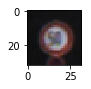

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
plotFigure(X_train)

## Visualize the dataset

(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

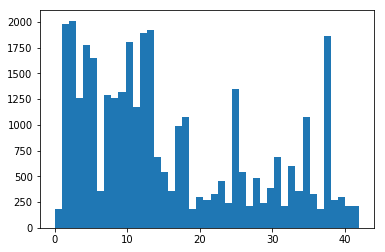

In [6]:
# Making a histogram for the distribution
plt.hist(y_train, bins = n_classes)

The dataset is skewed positively. This might be a problem when prediction is done

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

## Preprocess

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [7]:
### Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
### Feel free to use as many code cells as needed.
# TODO: Normalize the data features to the variable X_normalized
import cv2
# Grayscales an image
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

# Normalizes the data between 0.1 and 0.9 instead of 0 to 255    
def normalize(data):
    return data / 255 * 0.8 + 0.1

def convertImageToGrayScale(data):
    grayImages = []
    for image in data:
        gray = grayscale(image)
        grayImages.append(gray)
    return np.array(grayImages)


Visualizing the normalized data set after being normalized and grayscale

In [8]:
# TODO: One Hot encode the labels to the variable y_one_hot
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
y_one_hot = label_binarizer.fit_transform(y_train)
print (y_one_hot.shape)

(34799, 43)


### Split Data into Training, Validation and Testing Sets

In [9]:
### Split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split

## Split the training dateset 80(training):20 (validation)
X_train, X_validation, y_train, y_validation = train_test_split(train['features'], train['labels'], test_size=0.2, random_state=42)



print("Number of training examples =", X_train.shape[0])
print("Number of validation examples =", X_validation.shape[0])
print("Number of testing examples =", X_test.shape[0])


Number of training examples = 27839
Number of validation examples = 6960
Number of testing examples = 12630


Convert to gray scale and normalizing the training dataset
Finish converting and grayscaling the training dataset
Processed training data shape = (27839, 32, 32, 1)


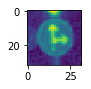

In [10]:

print ("Convert to gray scale and normalizing the training dataset")

# Iterate through grayscale
X_train_gray = convertImageToGrayScale(X_train)
X_train_axis = X_train_gray[..., newaxis]
X_normalized = normalize(X_train_axis)

print ("Finish converting and grayscaling the training dataset")

# Double-check that the image is changed to depth of 1
print("Processed training data shape =",X_normalized.shape)

plotFigure(X_normalized)

Converting to gray scale and normalizing the test data.
Finish converting and grayscaling the testing dataset
Processed testing data shape = (12630, 32, 32, 1)


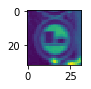

In [11]:
print('Converting to gray scale and normalizing the test data.')

# Iterate through grayscale
X_test_gray = convertImageToGrayScale(X_test)
X_test_axis= X_test_gray[..., newaxis]

# Normalize
X_test_normalized = normalize(X_test_axis) 

print('Finish converting and grayscaling the testing dataset')

# Double-check that the image is changed to depth of 1
print("Processed testing data shape =", X_test_normalized.shape)

plotFigure(X_test_normalized)

Converting to gray scale and normalizing the validation data.
Processed testing data shape = (6960, 32, 32, 1)
Finish converting and grayscaling the validation dataset


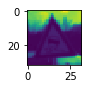

In [12]:
print('Converting to gray scale and normalizing the validation data.')

X_validation_gray = convertImageToGrayScale(X_validation)
X_validation_axis = X_validation_gray[..., newaxis]
X_validation_normalized = normalize(X_validation_axis)


# Double-check that the image is changed to depth of 1
print("Processed testing data shape =", X_validation_normalized.shape)

plotFigure(X_validation_normalized)
print('Finish converting and grayscaling the validation dataset')

# Question 1

#### 1. Describe how, and identify where in your code, you preprocessed the image data. What tecniques were chosen and why did you choose these techniques? Consider including images showing the output of each preprocessing technique. Pre-processing refers to techniques such as converting to grayscale, normalization, etc.

Answer:

Click this link to navigate to cell
[Preprocessing section](#Preprocess)

The following techniques are used to pre-process the images:

a) Gray scaling - implemented by the method convertImageToGrayScale. This will result the image to hold on intensity value.


b) Normalization - implemented by the method normalize. This will cause the dataset to have a constraint value between 0.1 and 0.9. This will help to bring the dataset distribution to a normal range.

# Question 2

#### 2. Describe how, and identify where in your code, you set up training, validation and testing data. How much data was in each set? Explain what techniques were used to split the data into these sets. (OPTIONAL: As described in the "Stand Out Suggestions" part of the rubric, if you generated additional data for training, describe why you decided to generate additional data, how you generated the data, identify where in your code, and provide example images of the additional data)

Answer:

Click on this link to navigate to cell
[Dataset separation](#Split-Data-into-Training,-Validation-and-Testing-Sets)

Total training data =  34799
This training data was split 80 (training example): 20 (validation example) 

    Number of training examples = 27839
    Number of validation examples = 6960
    Number of testing examples = 12630
    
 

### Model Architecture

In [13]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
EPOCHS = 40
BATCH_SIZE = 128



def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    # Gray scale results in dimension 1 instead of 3
    # conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)    
    

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout, to prevent overfitting
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits



# Question 3

#### 3. Describe, and identify where in your code, what your final model architecture looks like including model type, layers, layer sizes, connectivity, etc.) Consider including a diagram and/or table describing the final model.

Answer:

Click on this link to navigate to cell
[Model Architecture](#Model-Architecture)

I have used the LeNet model to work on this problem

My final model consist of the following layer

Layer  | Description | Output Shape
  ------------- | -------------  | -------------
 Input image  | Sample data pass to model                             |  32 x 32 x 1 
 Convolution  | First Convolution Layer, 1 x 1 stride, valid padding  |  28 x 28 x 6
 RELU         |                                                       |  28 x 28 x 6
 Max Pooling  | 2 x 2 stride, valid padding                           | 14 x 14 x6
 Convolution  | Second Convolution Layer, 1 x 1 stride, valid padding | 10 x 10 x 16
 RELU         |                                                       | 10 x 10 x 16
 Max Pooling  | 2 x2 stride, valid padding                            | 5 x 5 x 16
 Flatten      | Output the data to a 1 x 400 dimension vector             | 1 X 400
 Fully connected |  Output the data to 1 x 120 dimension vector  | 1 x 120
  RELU | | 1 x 120
  Dropout | Prevent Overfitting | 1 x 120
 Fully connected | Output the data to 1 x 84 dimension vector | 1 x 84
 RELU | | 1 x 84
 Dropout | Prevent overfitting | 1 x 84
 Fully connected | Output the data to 1 x 43 dimension vector | 1 x 43


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [14]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.


## Features and Labels
x = tf.placeholder(tf.float32, (None, 32, 32, 1)) ## Gray scale result the dimesion to be 1 instead of 3. x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)


keep_prob = tf.placeholder(tf.float32) # probability to keep units

## Training Pipeline
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, probability):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: probability})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples


## Train the Model

In [15]:

## Train the Model
save_file = './train/train_model'

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_normalized)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_normalized, y_train = shuffle(X_normalized, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_normalized[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_validation_normalized, y_validation, 0.5)
        
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, save_file)
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.306

EPOCH 2 ...
Validation Accuracy = 0.531

EPOCH 3 ...
Validation Accuracy = 0.641

EPOCH 4 ...
Validation Accuracy = 0.692

EPOCH 5 ...
Validation Accuracy = 0.736

EPOCH 6 ...
Validation Accuracy = 0.769

EPOCH 7 ...
Validation Accuracy = 0.785

EPOCH 8 ...
Validation Accuracy = 0.802

EPOCH 9 ...
Validation Accuracy = 0.814

EPOCH 10 ...
Validation Accuracy = 0.815

EPOCH 11 ...
Validation Accuracy = 0.836

EPOCH 12 ...
Validation Accuracy = 0.841

EPOCH 13 ...
Validation Accuracy = 0.844

EPOCH 14 ...
Validation Accuracy = 0.861

EPOCH 15 ...
Validation Accuracy = 0.870

EPOCH 16 ...
Validation Accuracy = 0.870

EPOCH 17 ...
Validation Accuracy = 0.886

EPOCH 18 ...
Validation Accuracy = 0.883

EPOCH 19 ...
Validation Accuracy = 0.886

EPOCH 20 ...
Validation Accuracy = 0.891

EPOCH 21 ...
Validation Accuracy = 0.893

EPOCH 22 ...
Validation Accuracy = 0.899

EPOCH 23 ...
Validation Accuracy = 0.896

EPOCH 24 ...
Validation Accura

# Question 4

#### 4. Describe how, and identify where in your code, you trained your model. The discussion can include the type of optimizer, the batch size, number of epochs and any hyperparameters such as learning rate.

Answer:

Click on this link to navigate to cell [Train, Validate and Test Model](#Train,-Validate-and-Test-the-Model)

It is a CNN using the LeNet model with following parameters. To train the model, the following settings are used:

    Type of optimzer : AdamOptimizer
    Batch size : 128
    Number of Epochs : 40
    Hyperparameters Learning rate : 0.001

## Evaluate the Model

In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('train/train_model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./train/'))

    test_accuracy = evaluate(X_test_normalized, y_test, 1.0)
    
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.925


# Question 5

#### 5. Describe the approach taken for finding a solution. Include in the discussion the results on the training, validation and test sets and where in the code these were calculated. Your approach may have been an iterative process, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think the architecture is suitable for the current problem.

Answer:

Click on the link to navigate to cell [Evaluate the Model](#Evaluate-the-Model)

My final model results (Witout Dropout) were: * This is done by commenting out the dropout statement in the LeNet method
    - validation set accuracy of - 98.5%
    - test set accuracy of - 90.8%


My final model results (With Dropout) were:
    - validation set accuracy of - 92.7%
    - test set accuracy of - 92.5%
    
I have chosen the LeNet architecture as it was discussed in the lecture to be a good fit to predict image classification problem.

An adjustment was made by adding dropout to reduce over fitting error.

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

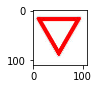

(110, 110, 3)


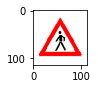

(114, 114, 3)


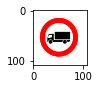

(109, 109, 3)


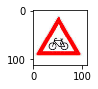

(112, 112, 3)


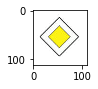

(112, 112, 3)


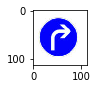

(113, 113, 3)


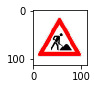

(113, 113, 3)


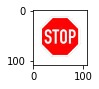

(109, 109, 3)


In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
# Importing the images, and let's take a look at what we have!

add_pics = os.listdir("data/")

# Show the images, add to a list to process for classifying
add_pics_data = []
for i in add_pics:
    i = 'data/' + i
    image = mpimg.imread(i)
    add_pics_data.append(image)    
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show()
    print (image.shape)

# Question 6

#### 6. Choose five German traffic signs found on the web and provide them in the report. For each image, discuss what quality or qualities might be difficult to classify.

Answer:

I have chosen 8 signs instead of the suggested 5.

Click on the link to navigate to the cell
[Test the Model on New Images](#Load-and-Output-the-Images)

Images  | Description / Quality | 
  ------------- | ------------- | 
 Yield  | You must give way to traffic on the intersecting road.Should be able to predict as it is part of the training dataset.                     
 Pedestrians  | Marks a general area where pedestrians may be on or near the road. Should be able to predict as it is part of the training dataset.
 Vehicles over 3.5t | Vehicles over 3.5t has 3 ClassIds 10 , 16, 42. The prediction should be either one of this 3 ids.
 Bicycle crossing | Should be able to predict as it is part of the training dataset.
 Priority road |  You have the right-of-way at all intersections on this road until cancelled by a "Yield", "Stop", or "End of Priority Road" sign; outside of urban areas, parking is prohibited on this road . Should be able to predict as it is part of the training dataset.
 Turn Right | All traffic must turn right. Should be able to predict as it is part of the training dataset.
 Road work | Watch for workers, machinery, dirt, or mud on the roadway. Should be able to predict as it is part of the training dataset.
 Stop | You must come to a complete stop and give way to traffic on the intersecting road. Should be able to predict as it is part of the training dataset.
 
 
 
 source : http://www.gettingaroundgermany.info/zeichen.shtml

In [18]:
add_pics = os.listdir("data/")

# Show the images, add to a list to process for classifying
add_pics_data = []
for i in add_pics:
    i = 'data/' + i
    image = mpimg.imread(i)
    image = cv2.resize(image, (32,32))
    add_pics_data.append(image)    
    #plt.figure(figsize=(1,1))
    #plt.imshow(image)
    #plt.show()
    #print (image.shape)

In [19]:
# Make into numpy array for processing
add_pics_data = np.array(add_pics_data)

print(add_pics_data.shape)

(8, 32, 32, 3)


## Process the input data

Converting to gray scale and normalizing the input data.
Processed input data shape = (8, 32, 32, 1)
Finish converting and grayscaling the input


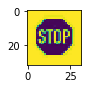

In [20]:
print('Converting to gray scale and normalizing the input data.')

input_gray = convertImageToGrayScale(add_pics_data)
input_axis = input_gray[..., newaxis]
input_normalized = normalize(input_axis)


# Double-check that the image is changed to depth of 1
print("Processed input data shape =", input_normalized.shape)

plotFigure(input_normalized)
print('Finish converting and grayscaling the input')

### Predict the Sign Type for Each Image

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loader = tf.train.import_meta_graph('train/train_model.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./train/'))
    sess = tf.get_default_session()
    new_pics_classes = sess.run(logits, feed_dict={x: input_normalized, keep_prob : 1.0})

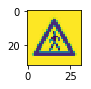

In [22]:
plotFigure(input_normalized)

### Analyze Performance

Image 0 probabilities: [  1.00000000e+00   7.91087425e-28   1.37238646e-30   0.00000000e+00
   0.00000000e+00] 
 and predicted classes: [13 35 15  0  1]
Image 1 probabilities: [  9.98937786e-01   1.00072497e-03   6.15109602e-05   5.70168251e-17
   2.31724226e-18] 
 and predicted classes: [27 18 24 11 25]
Image 2 probabilities: [  1.00000000e+00   7.09101250e-11   8.32232720e-12   3.82335743e-12
   6.03191311e-18] 
 and predicted classes: [16  7  9 10 41]
Image 3 probabilities: [  9.99996781e-01   3.17309764e-06   2.81420487e-08   7.14004456e-09
   1.50753587e-09] 
 and predicted classes: [29 22 24 20 31]
Image 4 probabilities: [  1.00000000e+00   1.19209442e-09   7.15459169e-15   2.04427273e-15
   1.84769226e-15] 
 and predicted classes: [12 40 41 18 11]
Image 5 probabilities: [  9.99956727e-01   4.32291563e-05   1.03304343e-08   1.14535803e-09
   1.21900677e-12] 
 and predicted classes: [33 35  9 10 19]
Image 6 probabilities: [  1.00000000e+00   4.81891785e-27   1.88607617e-30   1.796

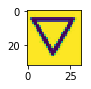

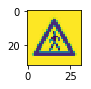

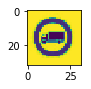

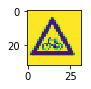

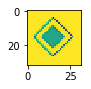

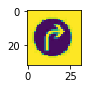

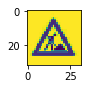

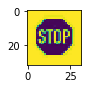

In [23]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

soft_max = tf.nn.softmax(new_pics_classes)

with tf.Session() as sess:
    predicts = sess.run(tf.nn.top_k(soft_max, k=5, sorted=True))
    
for i in range(len(predicts[0])):
    print('Image', i, 'probabilities:', predicts[0][i], '\n and predicted classes:', predicts[1][i])
    image = input_normalized[i].squeeze()
    plt.figure(figsize=(1,1))
    plt.imshow(image)

# Question 7

#### 7. Discuss the model's predictions on these new traffic signs and compare the results to predicting on the test set. Identify where in your code predictions were made. At a minimum, discuss what the predictions were, the accuracy on these new predictions, and compare the accuracy to the accuracy on the test set (OPTIONAL: Discuss the results in more detail as described in the "Stand Out Suggestions" part of the rubric).


Answer:

Click on this link to navigate to the cell [Analyse Prediction](#Analyze-Performance)


Result


Images  | Expected ClassId | Predicted ClassId
  ------------- | ------------- | -------------
 Yield  | 13 |          13        
 Pedestrians  | 27 | 27
 Vehicles over 3.5t | 10,16,42  | 16
 Bicycle crossing | 29 | 29
 Priority road |  12 | 12
 Turn Right | 33 |  33
 Road work | 25 | 25
 Stop | 14 | 14

# Question 8

#### 8. Describe how certain the model is when predicting on each of the five new images by looking at the softmax probabilities for each prediction and identify where in your code softmax probabilities were outputted. Provide the top 5 softmax probabilities for each image along with the sign type of each probability. (OPTIONAL: as described in the "Stand Out Suggestions" part of the rubric, visualizations can also be provided such as bar charts)

Answer:


Images  | Sofmax
  ------------- | -------------
 Yield  |   1
 Pedestrians  | 1
 Vehicles over 3.5t | 1
 Bicycle crossing | 1
 Priority road | 1
 Turn Right | 1
 Road work | 1
 Stop | 1
 
 
 
 It is expected the prediction to have high probability as the new German Traffic Signs images are trained by the model using German Traffic Signs.

 ## Yield Image (Expected ClassId 13)

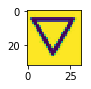

In [24]:
image = input_normalized[0].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

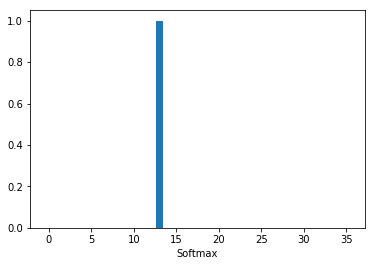

In [25]:
plt.bar(predicts[1][0], predicts[0][0])
plt.xlabel('Classes')
plt.xlabel('Softmax')
plt.show()

## Pedestrian Image (Expected ClassId 27)

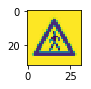

In [26]:
image = input_normalized[1].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

[  9.98937786e-01   1.00072497e-03   6.15109602e-05   5.70168251e-17
   2.31724226e-18]
[27 18 24 11 25]


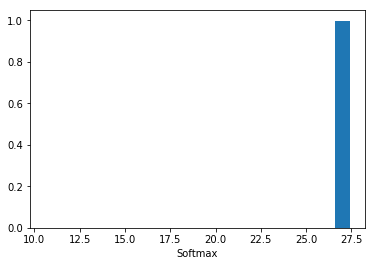

In [27]:
print (predicts[0][1])
print (predicts[1][1])


plt.bar(predicts[1][1], predicts[0][1])
plt.xlabel('Classes')
plt.xlabel('Softmax')
plt.show()

## Vehicles over 3.5t Image (Expected ClassId 16)

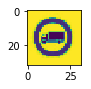

In [28]:
image = input_normalized[2].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

[16  7  9 10 41]
[  1.00000000e+00   7.09101250e-11   8.32232720e-12   3.82335743e-12
   6.03191311e-18]


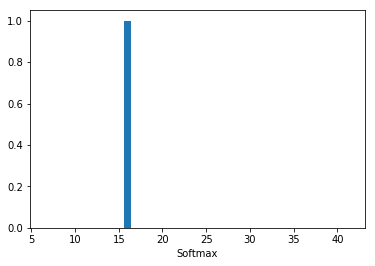

In [29]:
print (predicts[1][2])
print (predicts[0][2])


plt.bar(predicts[1][2], predicts[0][2])
plt.xlabel('Classes')
plt.xlabel('Softmax')
plt.show()

## Bicycle crossing (Expected ClassId 29)

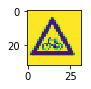

In [30]:
image = input_normalized[3].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

[29 22 24 20 31]
[  9.99996781e-01   3.17309764e-06   2.81420487e-08   7.14004456e-09
   1.50753587e-09]


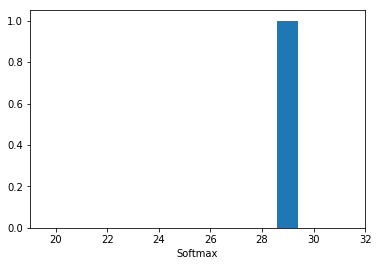

In [31]:
print (predicts[1][3])
print (predicts[0][3])


plt.bar(predicts[1][3], predicts[0][3])
plt.xlabel('Classes')
plt.xlabel('Softmax')
plt.show()

## Priority road Image (Expected ClassId 12)

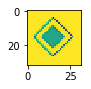

In [32]:
image = input_normalized[4].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

[12 40 41 18 11]
[  1.00000000e+00   1.19209442e-09   7.15459169e-15   2.04427273e-15
   1.84769226e-15]


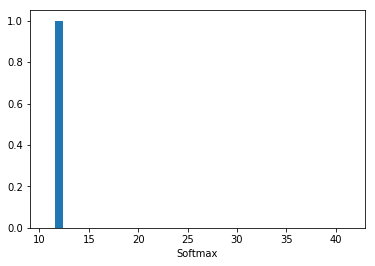

In [33]:
print (predicts[1][4])
print (predicts[0][4])


plt.bar(predicts[1][4], predicts[0][4])
plt.xlabel('Classes')
plt.xlabel('Softmax')
plt.show()

## Turn Right Image (Expected ClassId 33)

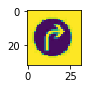

In [34]:
image = input_normalized[5].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

[33 35  9 10 19]
[  9.99956727e-01   4.32291563e-05   1.03304343e-08   1.14535803e-09
   1.21900677e-12]


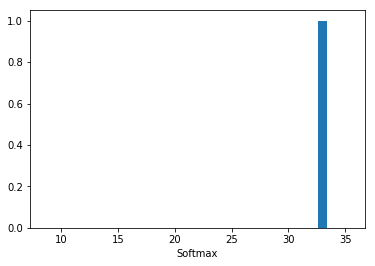

In [35]:
print (predicts[1][5])
print (predicts[0][5])


plt.bar(predicts[1][5], predicts[0][5])
plt.xlabel('Classes')
plt.xlabel('Softmax')
plt.show()

## Road work Image (Expected ClassId 25)

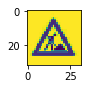

In [36]:
image = input_normalized[6].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

[25 22 20 29 18]
[  1.00000000e+00   4.81891785e-27   1.88607617e-30   1.79626939e-31
   3.29934698e-32]


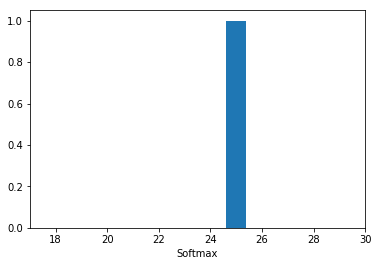

In [37]:
print (predicts[1][6])
print (predicts[0][6])


plt.bar(predicts[1][6], predicts[0][6])
plt.xlabel('Classes')
plt.xlabel('Softmax')
plt.show()

## Stop Image (Expected ClassId 14)

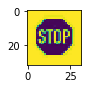

In [38]:
image = input_normalized[7].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)

[14 38 34 17 13]
[  1.00000000e+00   1.11286692e-11   6.07588741e-13   4.56373643e-17
   1.98007550e-17]


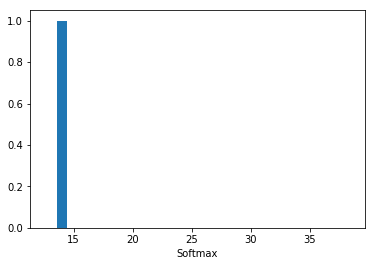

In [39]:
print (predicts[1][7])
print (predicts[0][7])

plt.bar(predicts[1][7], predicts[0][7])
plt.xlabel('Classes')
plt.xlabel('Softmax')
plt.show()

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 